In [1]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import gridspec

import requests
from io import StringIO as sio

import baltic as bt


Tree height: 29.430115
Tree length: 451.887106
strictly bifurcating tree
annotations present

Numbers of objects in tree: 903 (451 nodes and 452 leaves)



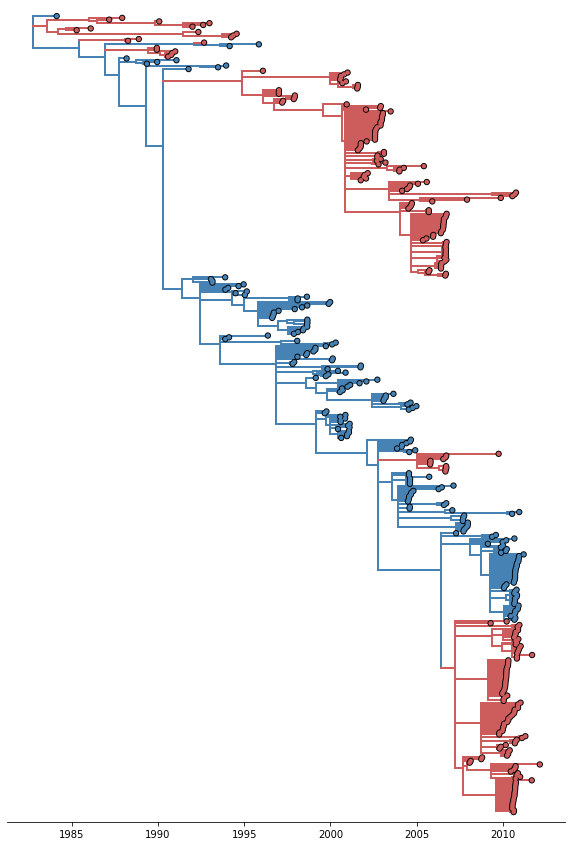

In [2]:
address='https://raw.githubusercontent.com/evogytis/fluB/master/data/mcc%20trees/InfB_NPt_ALLs1.mcc.tre' ## address of example tree
fetch_tree = requests.get(address) ## fetch tree
treeFile=sio(fetch_tree.text) ## stream from repo copy

ll=bt.loadNexus(treeFile,tip_regex='_([0-9\-]+)$') ## treeFile here can alternatively be a path to a local file
ll.treeStats() ## report stats about tree

fig,ax = plt.subplots(figsize=(10,15),facecolor='w')

traitName='PB1'
tipSize=20

collapsed_tree=ll.collapseBranches(lambda k: k.traits['posterior']<0.95) ## collapse branches that have <0.95 posterior support

x_attr=lambda k: k.absoluteTime
c_func=lambda k: 'indianred' if k.traits[traitName]=='V' else 'steelblue' ## Victoria lineage red, Yamagata blue

collapsed_tree.plotTree(ax,x_attr=x_attr,colour=c_func)
collapsed_tree.plotPoints(ax,x_attr=x_attr,size=tipSize,colour=c_func,zorder=100)

ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

[ax.spines[loc].set_visible(False) for loc in ['top','right','left']]

ax.tick_params(axis='y',size=0)
ax.set_yticklabels([])
ax.set_ylim(-5,collapsed_tree.ySpan+5)

plt.show()

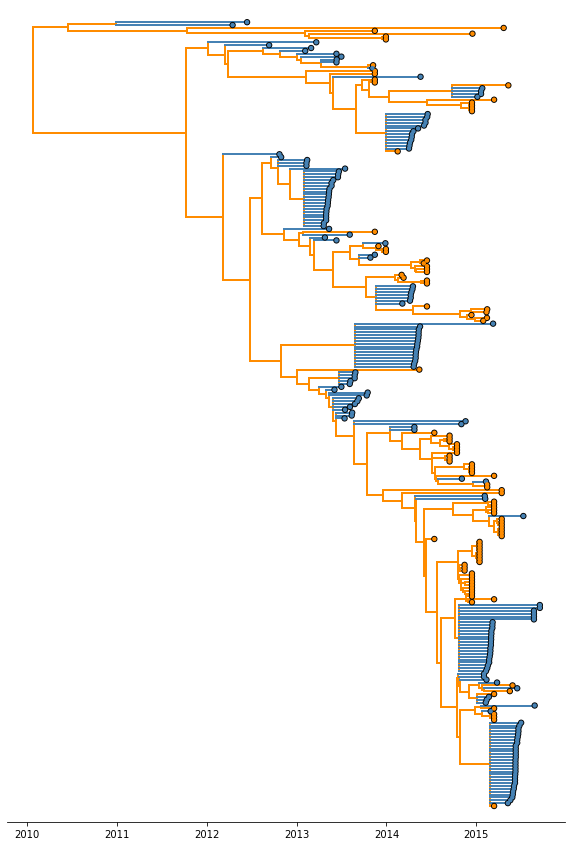

In [3]:
address='https://github.com/sdwfrost/mers-treedater/raw/master/MERS_274_sCoal.combinedTyped.mcc.tree' ## where the tree we'll use lives

fetch_tree = requests.get(address) ## fetch tree
treeFile=sio(fetch_tree.text) ## stream from repo copy

ll=bt.loadNexus(treeFile) ## treeFile here can alternatively be a path to a local file

fig,ax = plt.subplots(figsize=(10,15),facecolor='w')

tipSize=20

collapsed_tree=ll.collapseBranches(lambda k: k.traits['type']=='h') ## collapse branches present in humans

x_attr=lambda k: k.absoluteTime
c_func=lambda k: 'darkorange' if k.traits['type']=='c' else 'steelblue' # orange for camel, blue for human

collapsed_tree.plotTree(ax,x_attr=x_attr,colour=c_func)
collapsed_tree.plotPoints(ax,x_attr=x_attr,size=tipSize,colour=c_func,zorder=100)

ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

[ax.spines[loc].set_visible(False) for loc in ['top','right','left']]

ax.tick_params(axis='y',size=0)
ax.set_yticklabels([])
ax.set_ylim(-5,collapsed_tree.ySpan+5)

plt.show()